# [Assignment 4 of AI course](https://drive.google.com/drive/folders/1hjxTXWzahhOllFe8c60T55-qmNknMPsT?fbclid=IwZXh0bgNhZW0CMTEAAR1d_pmRayd3mXkSsnQwEPdxv5hyymatALGBdmQpB6YnbKSPASgLi0pKhHg_aem_AdIzUQeNCwzphTOxZtQLmeehW4DVaXTMYNh6MEC7OYHDseZyUY1Rh6Kg2ylgxI9QR_KQSyDGBla01CoWEOdxzOYK)
Data Science and Data Visualization

**[Umer Tariq](www.linkedin.com/in/umer-tariq-455b88294)**

In [1]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

## Question no.1:
Perform the following tasks: (20 Marks)  
● Load the famous Titanic dataset  
● Check the first few rows and data types.  
● Handle any missing values in the dataset, if present.  
● Check for and handle any outliers in the data. (if there)  
● Use matplotlib and seaborn to visualize the data distributions  
● Create a new column indicating whether a passenger is a child, adult, or elderly based on their age.  
● Calculate the average fare paid by passengers in each class.   
● Create a pairplot to visualize relationships between multiple numerical
variables.  
● Generate a heatmap to display the correlation matrix of these variables.  
● Identify and print pairs of variables with the highest and lowest correlation coefficients   

Dataset: Dataset is provided or you get from [Titanic Dataset](https://www.kaggle.com/datasets/yasserh/titanic-dataset?select=Titanic-Dataset.csv)

In [301]:
# Imporing the titanic dataset from the kaggle api
# kaggle datasets download -d yasserh/titanic-dataset

# Loading the titanic dataset
titanic_df = pd.read_csv("titanic-dataset.zip", index_col='PassengerId')

In [302]:
# Viewing the head of the dataset
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [303]:
# Viewing the tail of the dataset
titanic_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [304]:
# Checking the info about the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [305]:
# Checking the description of the numerical columns of the dataset
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

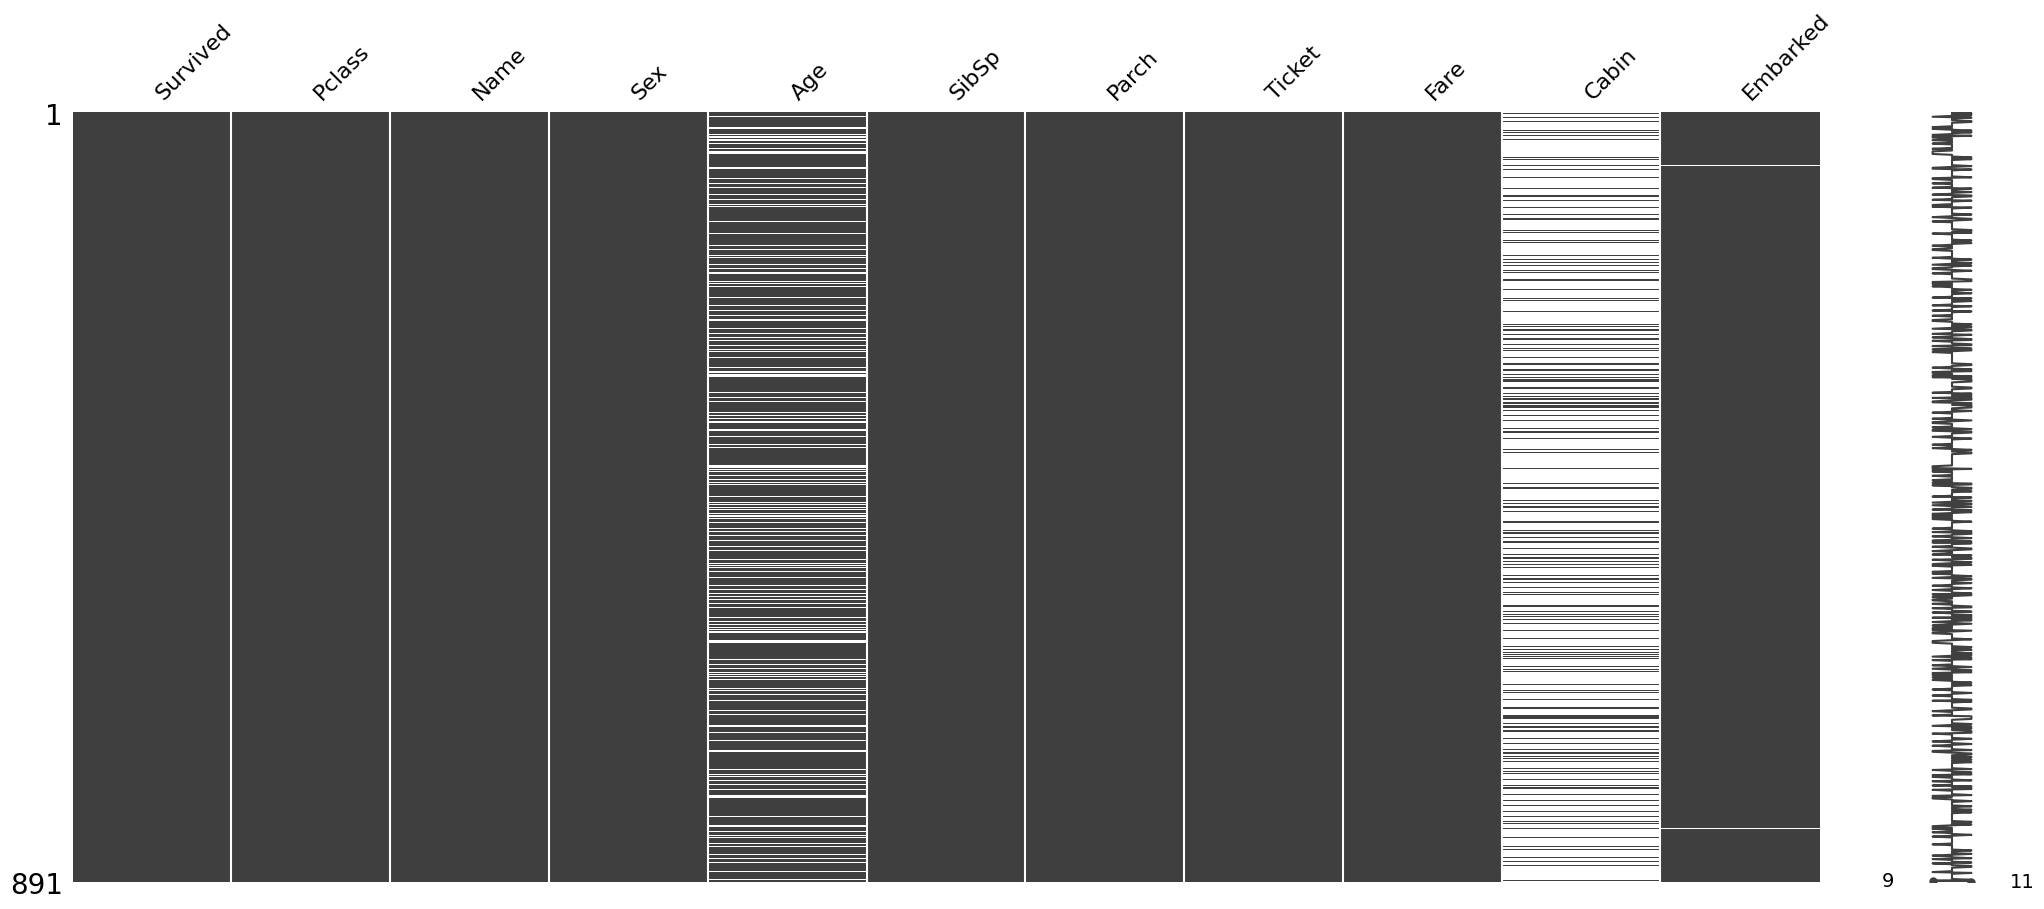

In [306]:
msno.matrix(titanic_df)

> We can see that:

*   **Cabin** column contains **a lot of missing values** so we will drop it
*   **Ticket** and **Name** column **does not provide any help** in our analysis and model trainig so we will **drop them as well**
*   **Embarked** column contains **2 missing values** so we will drop those rows
*   We will **onehot encode the Embarked column** as it containd three ordinal values





In [307]:
# Dropping the Cabin, Ticket and Name column
titanic_df = titanic_df.drop(['Cabin','Ticket','Name'], axis=1)
# Dropping any remaining row with null values
titanic_df = titanic_df.dropna()

<Axes: xlabel='Age'>

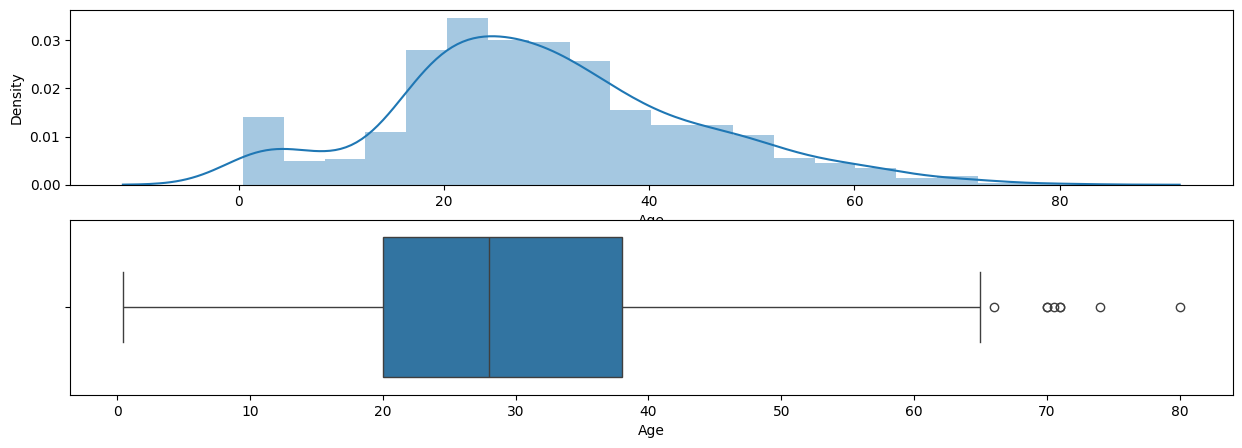

In [308]:
# Cheking the outliers in the Age column
fig, ax = plt.subplots(2,1, figsize=(15,5))
sns.distplot(titanic_df['Age'], ax=ax[0])
sns.boxplot(x=titanic_df['Age'], ax=ax[1])

People can have Age of 80 so we don't need to remove it

<Axes: xlabel='Fare'>

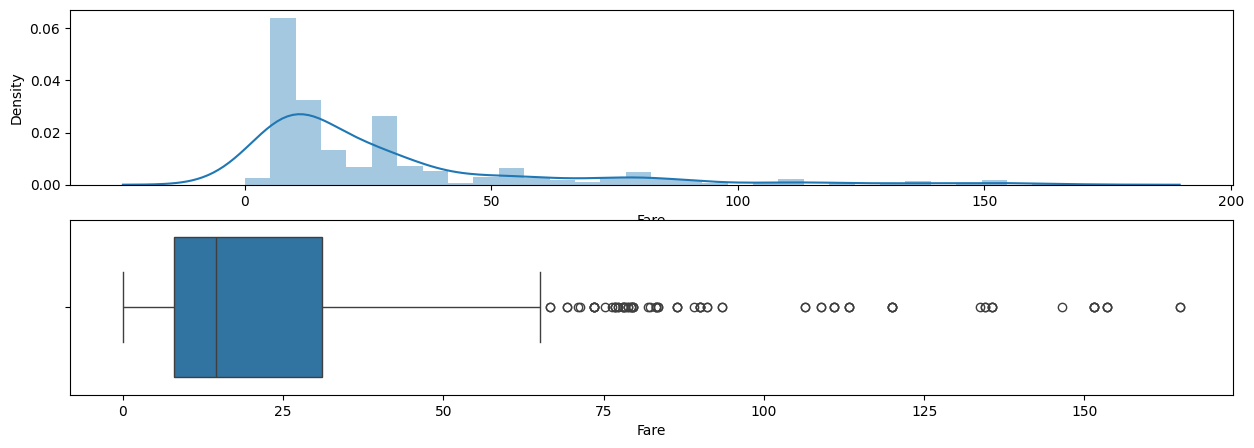

In [298]:
# I removes some of the intense ourliers
titanic_df = titanic_df[titanic_df['Fare'] < 200]
# Plotting to check the ourliers in the Fare column
fig, ax = plt.subplots(2,1, figsize=(15,5))
sns.distplot(titanic_df['Fare'], ax=ax[0])
sns.boxplot(x=titanic_df['Fare'], ax=ax[1])

I stripped the fair above 200 so I think it would be ok now.

In [299]:
# Creating a new column based on the age to check the child, adult and elderly people in the dataset
bins = [0, 16, 60, 100]
labels = ['Child', 'Adult', 'Elderly']
titanic_df['Age_Category'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels)

In [300]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Category
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Adult
2,1,1,female,38.0,1,0,71.2833,C,Adult
3,1,3,female,26.0,0,0,7.9250,S,Adult
4,1,1,female,35.0,1,0,53.1000,S,Adult
5,0,3,male,35.0,0,0,8.0500,S,Adult
...,...,...,...,...,...,...,...,...,...
886,0,3,female,39.0,0,5,29.1250,Q,Adult
887,0,2,male,27.0,0,0,13.0000,S,Adult
888,1,1,female,19.0,0,0,30.0000,S,Adult


<Axes: ylabel='Pclass'>

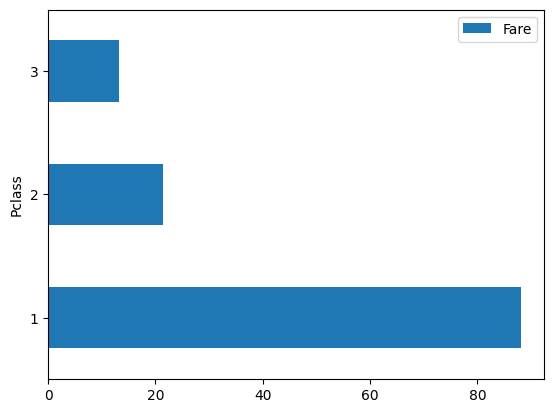

In [310]:
# Plotting the average fare paid by passenger of different class
titanic_df.groupby('Pclass').agg({'Fare': 'mean'}).plot(kind='barh')

We can see that the first class passenger paid the highest fare, than second class and than third class.

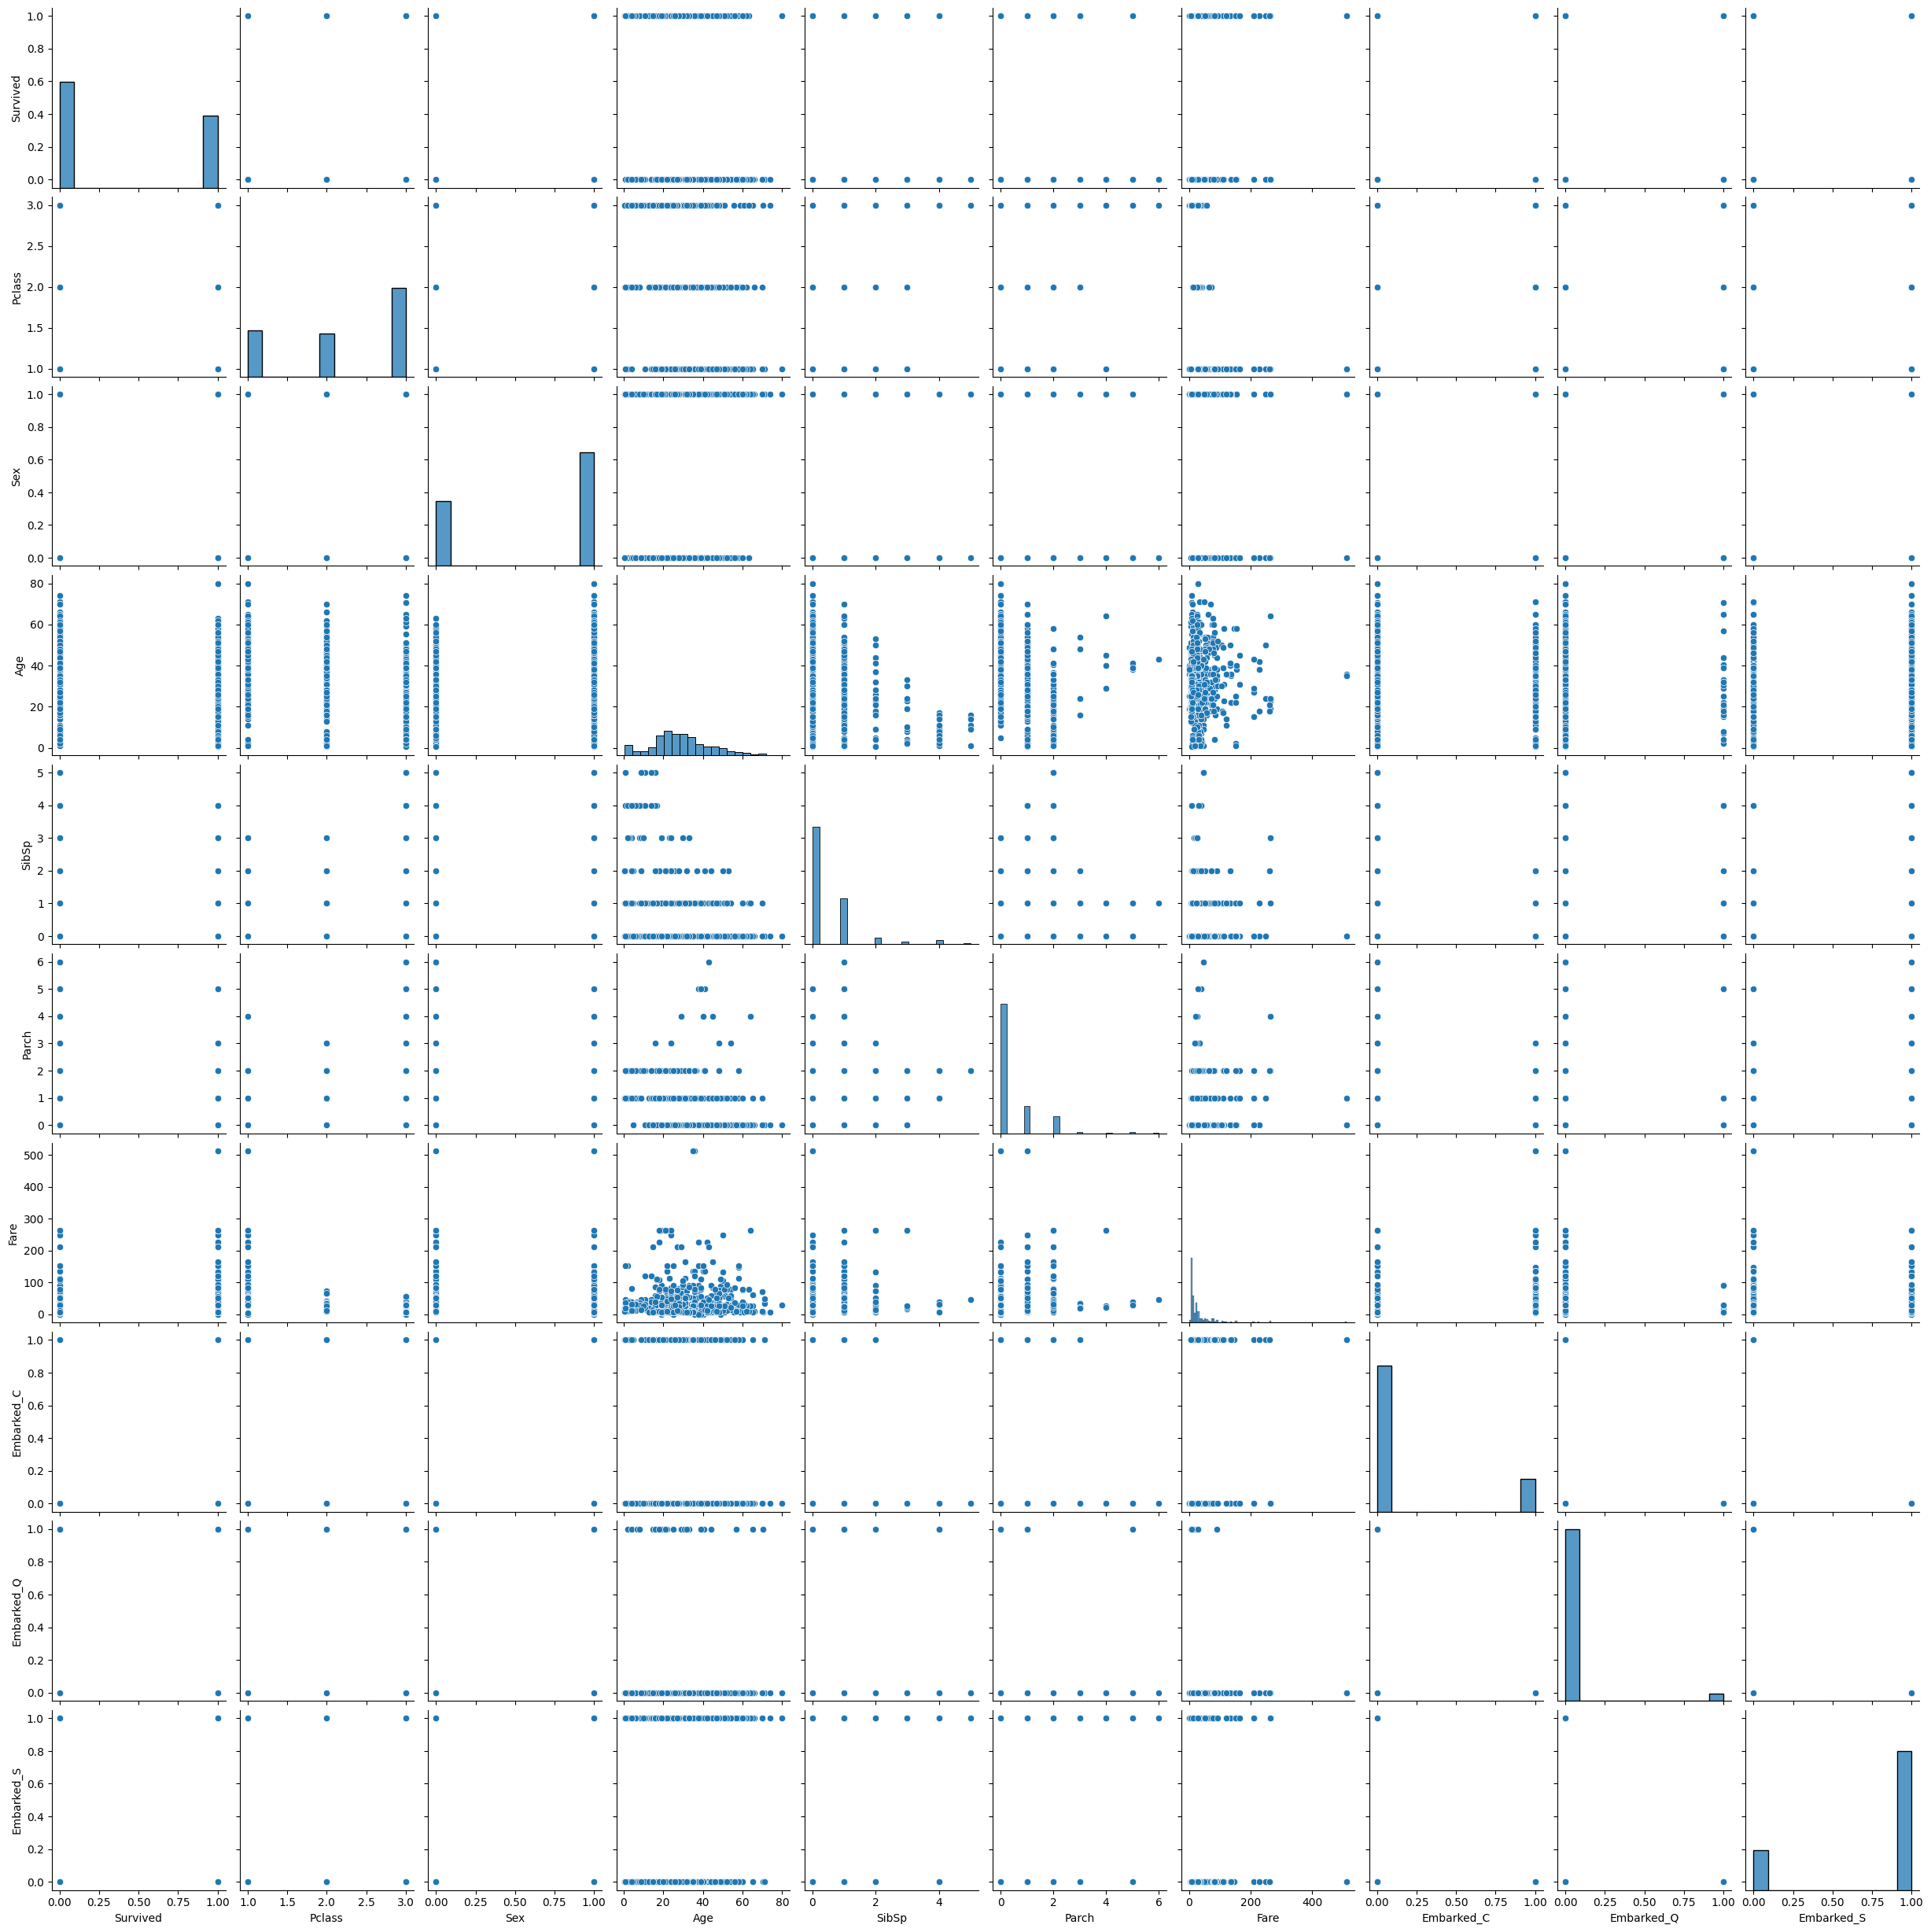

In [141]:
|# Plotting the pair plot
sns.pairplot(titanic_df)

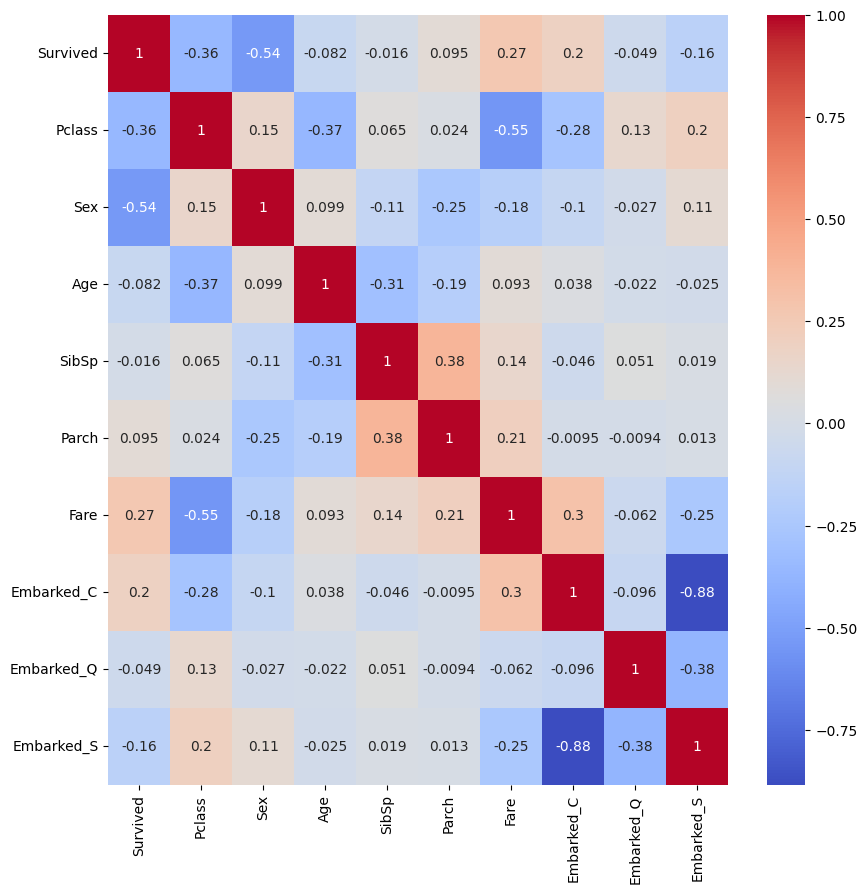

In [139]:
# plotting the heatmap
fig = plt.figure(figsize=(10,10))
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm')
plt.show()


>We can see that:

* People who had **higher class survived more** due to high priority given to them during the evacuation
* Females survived more than make due to the high priority given to them during the evacuation

**Let check them separately**

<Axes: xlabel='Pclass', ylabel='Survived'>

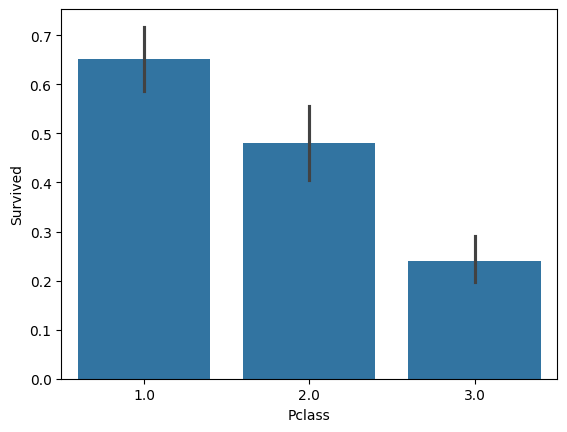

In [107]:
# Plotting the barplot to check the relation between survival and passanger class
sns.barplot(data=titanic_df, x='Pclass', y='Survived')

<Axes: xlabel='Sex', ylabel='Survived'>

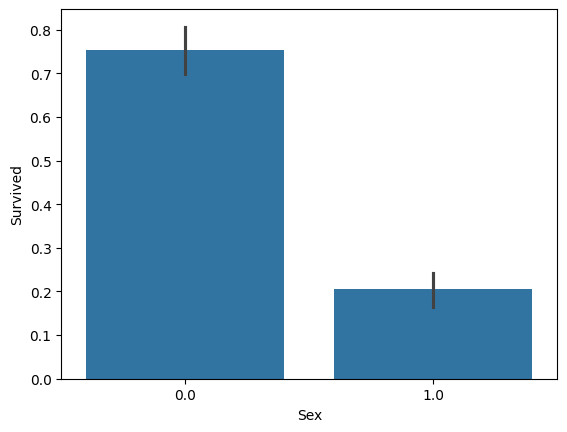

In [142]:
# Plotting a barplot to check the relationship between the survival and Sex
sns.barplot(data=titanic_df, x='Sex', y='Survived')

Yes our observations were right

## Question 2:
Perform the following task: (20 Marks)

* Explore the Netflix dataset to understand the distribution of movies vs. TV
shows, identify the
* countries producing the most content, and analyze the trend of releases over the years.
* What genres
are most common, and how does the rating distribution vary across genres?

Dataset: [Netflix Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)

In [242]:
# Getting the netflix dataset from the kaggle
# !kaggle datasets download -d shivamb/netflix-shows
# Loading the netflix dataset
netflix_df = pd.read_csv("netflix-shows.zip",
                         index_col='show_id',
                         parse_dates=['release_year'],
                         infer_datetime_format=True)

# Now we will also convert the date_added column to datetime format. We didn't performed it earlier with release_year because I analyzed that there were
# whitespaces in the dates so we needed to first use the .strip() method to remove them. Then we would be able to convert the dates in datetime
netflix_df['date_added'] = netflix_df['date_added'].str.strip()
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
netflix_df['date_added'] = netflix_df['date_added'].dt.year

# Dropping the title column as it doesn't give us any information
netflix_df = netflix_df.drop('title', axis=1)

# The parse date converted the release year into yyyy-mm-dd format. We will convert it back to the yyyy format
netflix_df['release_year'] = netflix_df['release_year'].dt.year

<ipython-input-242-34ec434c80b6>:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  netflix_df = pd.read_csv("netflix-shows.zip",


In [243]:
netflix_df.head()

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,
s1,Movie,Kirsten Johnson,NaN,United States,2021.0,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021.0,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021.0,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,NaN,NaN,NaN,2021.0,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021.0,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<Axes: title={'center': 'Movies vs TV shows'}, xlabel='type'>

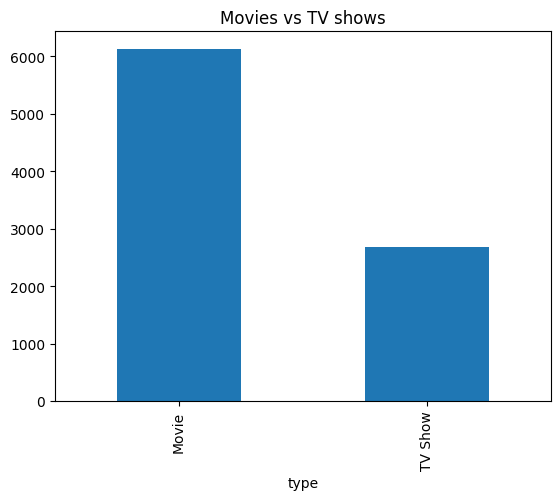

In [245]:
# Plotting barplot to compare movies and TV shows
netflix_df['type'].value_counts().plot(kind='bar', title='Movies vs TV shows')

<Axes: title={'center': 'Top 10 countries'}, ylabel='country'>

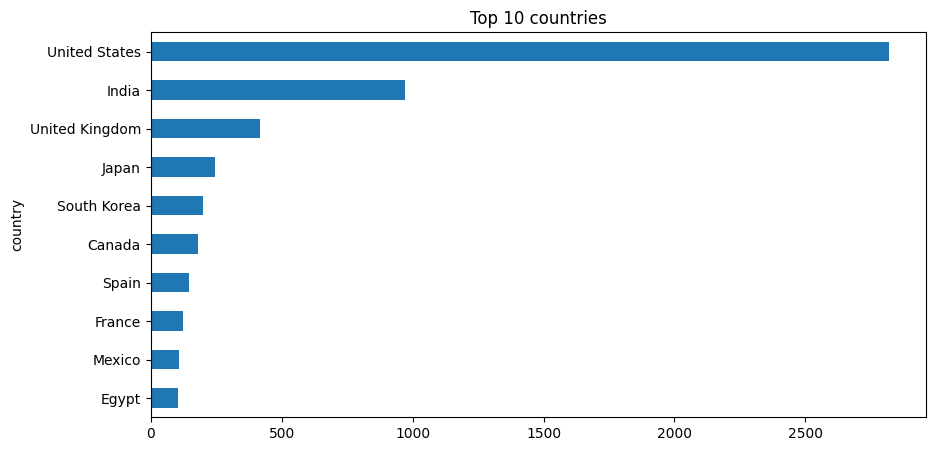

In [257]:
netflix_df['country'].value_counts().head(10)[::-1].plot(kind='barh', title='Top 10 countries', figsize=(10,5))

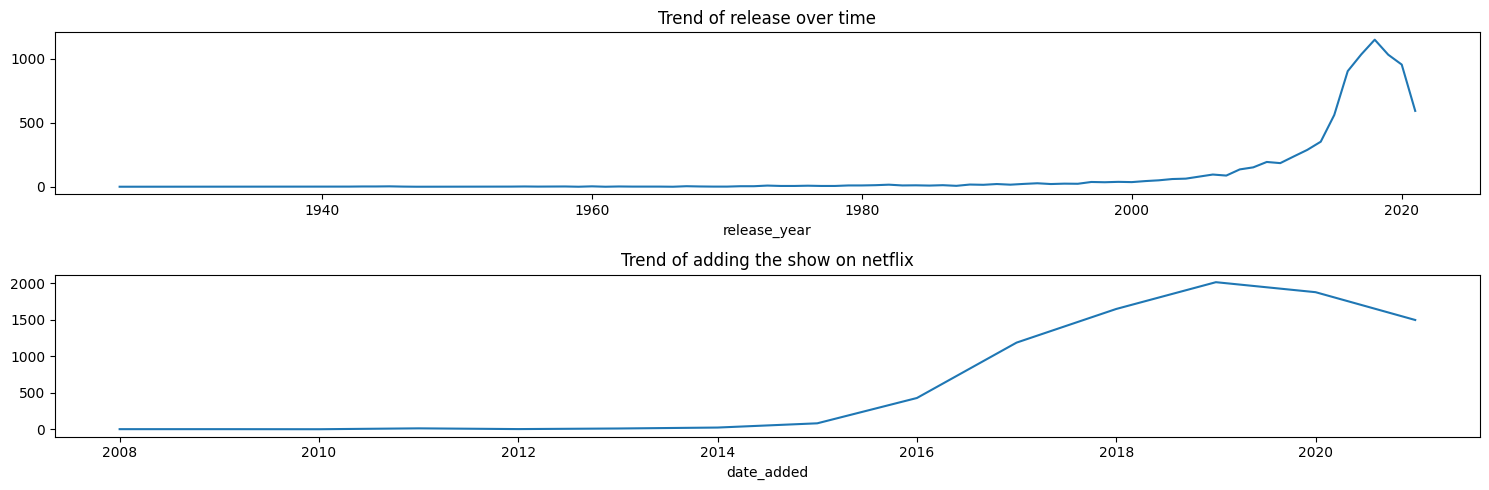

In [247]:
fig, ax = plt.subplots(2,1, figsize=(15,10))
netflix_df.groupby('release_year').size().plot(kind='line', figsize=(15,5), title='Trend of release over time', ax=ax[0])
netflix_df.groupby('date_added').size().plot(kind='line', figsize=(15,5), title='Trend of adding the show on netflix', ax=ax[1])
plt.tight_layout()
plt.show()

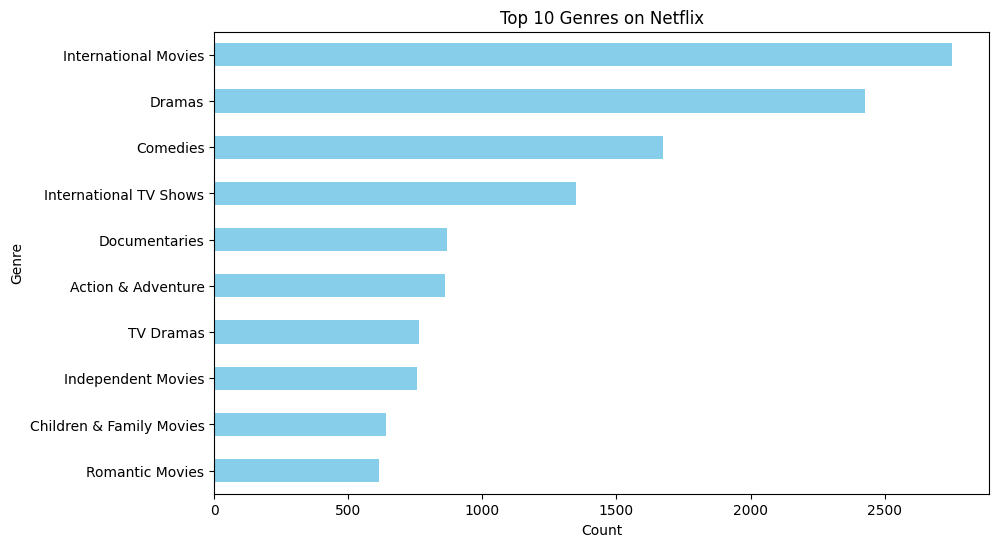

In [256]:
# Splitting the genres within each entry and stack them into separate rows
genre_df = netflix_df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('listed_in')

# Counting the occurrences of each genre and reverse the order of the counts
genre_counts = genre_df.value_counts().head(10)[::-1]

# Plotting the inverted horizontal bar plot
genre_counts.plot(kind='barh', color='skyblue', figsize=(10, 6))

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 10 Genres on Netflix')

# Showing the plot
plt.show()


<Axes: title={'center': 'Top 10 rating'}, ylabel='rating'>

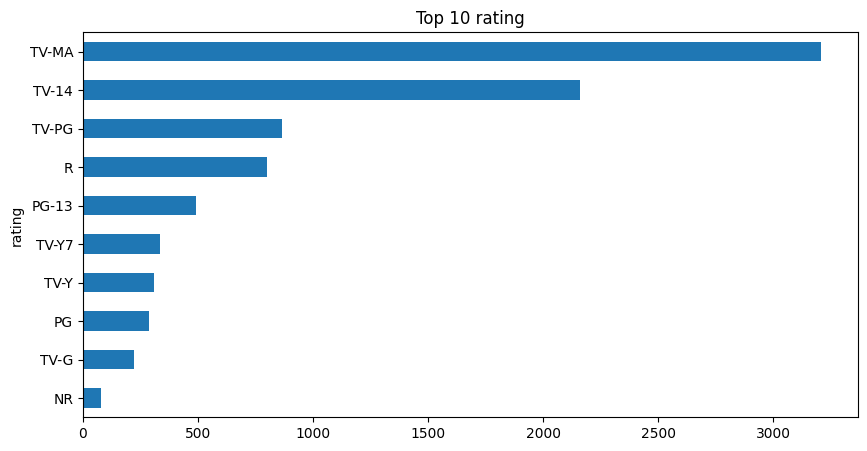

In [259]:
netflix_df['rating'].value_counts().head(10)[::-1].plot(kind='barh', title='Top 10 rating', figsize=(10,5))

# Question 3:
Perform the following task: (20 Marks)  
* Conduct an exploratory data analysis on the Melbourne Housing Market dataset.   
* Identify trends in housing prices over time.  
* Analyze the impact of location  
* And explore the relationship between property attributes (such as the number of rooms, type of property, and land size) and price.

Dataset: [Melbourne Housing Market](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market)

In [424]:
# Importing the housing dataset from kaggle
# ! kaggle datasets download -d anthonypino/melbourne-housing-market
# ! unzip /content/melbourne-housing-market.zip

# Loading the housing dataset
price_df = pd.read_csv('/content/MELBOURNE_HOUSE_PRICES_LESS.csv')
full_df = pd.read_csv('/content/Melbourne_housing_FULL.csv')

# Removing the duplicates from both datasets
full_df = full_df.drop_duplicates()
price_df = price_df.drop_duplicates()

# Combining both datasets(also removing the duplicates because they both comtain many duplicates rows when combined)
combined_df = pd.concat([full_df, price_df[~price_df.index.isin(full_df.index)]])
combined_index = combined_df[price_df.columns].drop_duplicates().index
combined_df = combined_df[combined_df.index.isin(combined_index)]

# Converting date column to datetime format and also creating new column from it
combined_df['Date'] = pd.to_datetime(combined_df.Date, dayfirst=True)
combined_df['year'] = combined_df['Date'].dt.year
combined_df['month'] = combined_df['Date'].dt.month

# Striping the intense outliers in the BuildingArea column
combined_df = combined_df[combined_df.BuildingArea < 1000]
# Striping the intense outliers in the price column
combined_df = combined_df[combined_df.Price < 0.7e7]

In [425]:
combined_df.shape

(10644, 23)

In [426]:
combined_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,year,month
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016,2
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,2017,3
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,2016,6
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-05-07,2.5,3067.0,...,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0,2016,5
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-10-08,2.5,3067.0,...,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,2016,10


In [427]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10644 entries, 2 to 34856
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         10644 non-null  object        
 1   Address        10644 non-null  object        
 2   Rooms          10644 non-null  int64         
 3   Type           10644 non-null  object        
 4   Price          10644 non-null  float64       
 5   Method         10644 non-null  object        
 6   SellerG        10644 non-null  object        
 7   Date           10644 non-null  datetime64[ns]
 8   Distance       10644 non-null  float64       
 9   Postcode       10644 non-null  float64       
 10  Bedroom2       10644 non-null  float64       
 11  Bathroom       10644 non-null  float64       
 12  Car            10467 non-null  float64       
 13  Landsize       9370 non-null   float64       
 14  BuildingArea   10644 non-null  float64       
 15  YearBuilt      10242 non

In [428]:
combined_df.describe()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,year,month
count,10644.000000,1.064400e+04,10644,10644.000000,10644.000000,10644.000000,10644.000000,10467.000000,9370.000000,10644.000000,10242.000000,10635.000000,10635.000000,10644.000000,10644.000000,10644.000000
mean,3.106539,1.084859e+06,2017-05-02 06:11:21.848929024,11.490210,3115.595547,3.088313,1.658117,1.709850,522.167556,150.455002,1966.418278,-37.804730,144.991624,7475.095077,2016.778467,7.186396
min,1.000000,1.310000e+05,2016-02-04 00:00:00,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.185600,144.423790,249.000000,2016.000000,1.000000
25%,3.000000,6.400000e+05,2016-11-07 00:00:00,6.400000,3044.000000,2.000000,1.000000,1.000000,207.000000,100.000000,1950.000000,-37.859765,144.919490,4380.000000,2016.000000,5.000000
50%,3.000000,8.912500e+05,2017-06-17 00:00:00,10.400000,3084.000000,3.000000,2.000000,2.000000,468.000000,133.000000,1970.000000,-37.798800,144.998900,6543.000000,2017.000000,8.000000
75%,4.000000,1.330000e+06,2017-10-14 00:00:00,14.300000,3153.000000,4.000000,2.000000,2.000000,650.000000,181.000000,2000.000000,-37.747700,145.066665,10331.000000,2017.000000,10.000000
max,12.000000,6.600000e+06,2018-03-17 00:00:00,48.100000,3978.000000,12.000000,9.000000,10.000000,42800.000000,999.000000,2019.000000,-37.397800,145.526350,21650.000000,2018.000000,12.000000
std,0.959931,6.665740e+05,NaN,7.122648,122.222103,0.962365,0.718273,0.969722,1123.283245,85.033654,37.269022,0.093742,0.123387,4379.671205,0.637076,3.054090


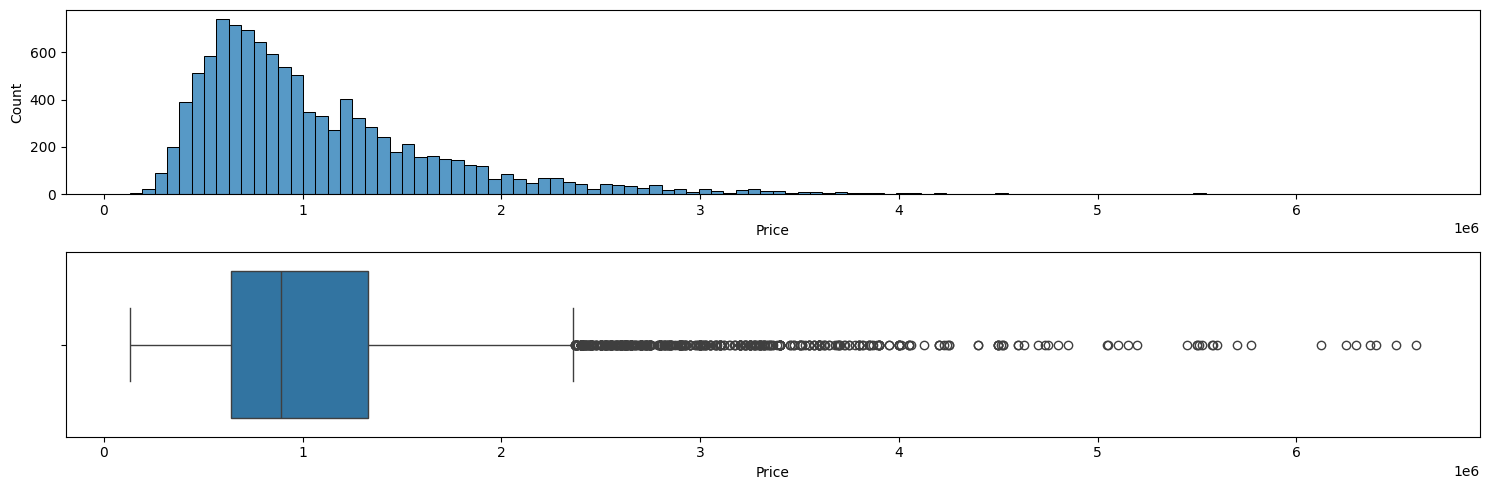

In [429]:
# Creating histogram and boxplot ot see the distribution of prices column
fig, ax = plt.subplots(2,1, figsize=(15,5))
sns.histplot(data=combined_df, x='Price', ax=ax[0])
sns.boxplot(data=combined_df, x='Price', ax=ax[1])
plt.tight_layout()
plt.show()

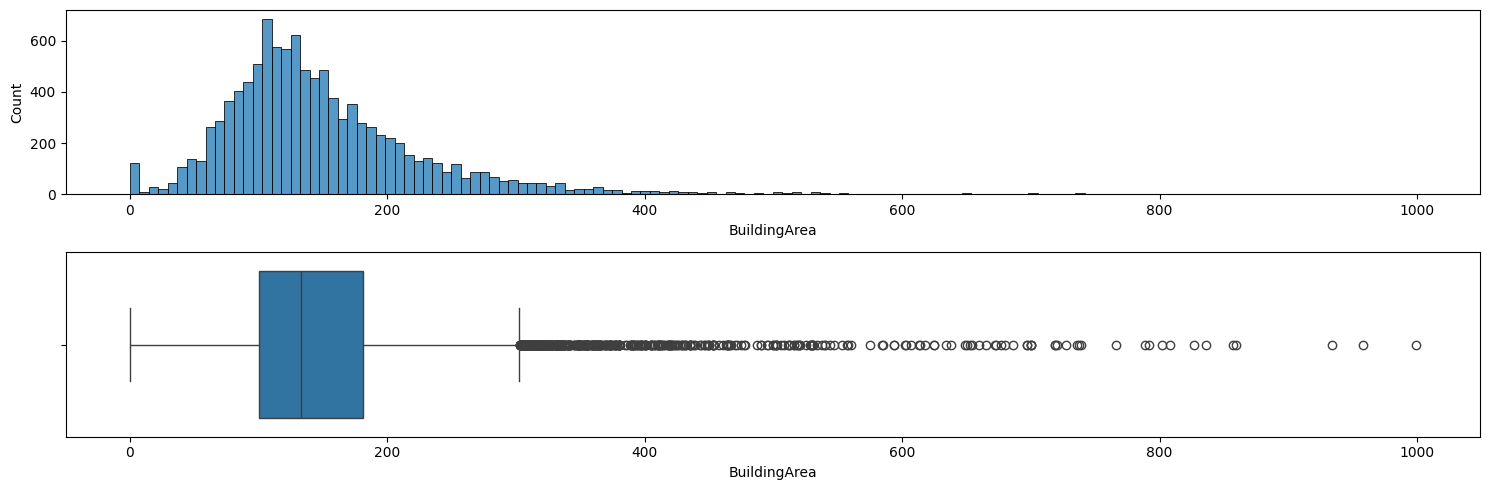

In [430]:
# Creating histogram and boxplot ot see the distribution of prices column
fig, ax = plt.subplots(2,1, figsize=(15,5))
sns.histplot(data=combined_df, x='BuildingArea', ax=ax[0])
sns.boxplot(data=combined_df, x='BuildingArea', ax=ax[1])
plt.tight_layout()
plt.show()

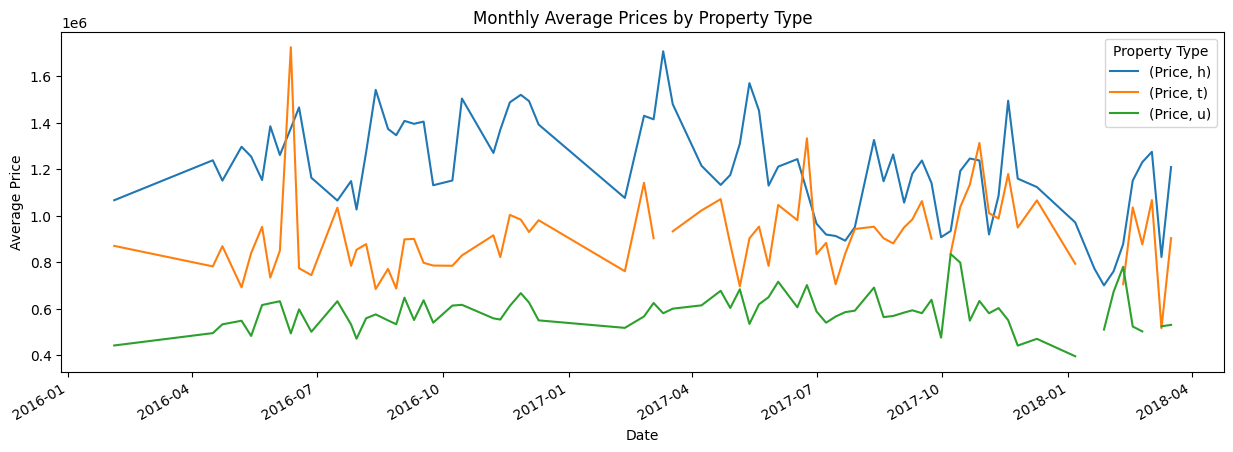

In [431]:
# Lets break the trend on the basis of Type of house to see the price trend of different type of houses
grouped_by_type = combined_df.groupby(['Type','Date'])['Price'].mean().to_frame()
# Group by property type and get monthly averages
grouped_by_type.unstack(level=0).plot(figsize=(15,5))
plt.title('Monthly Average Prices by Property Type')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend(title='Property Type')
plt.show()

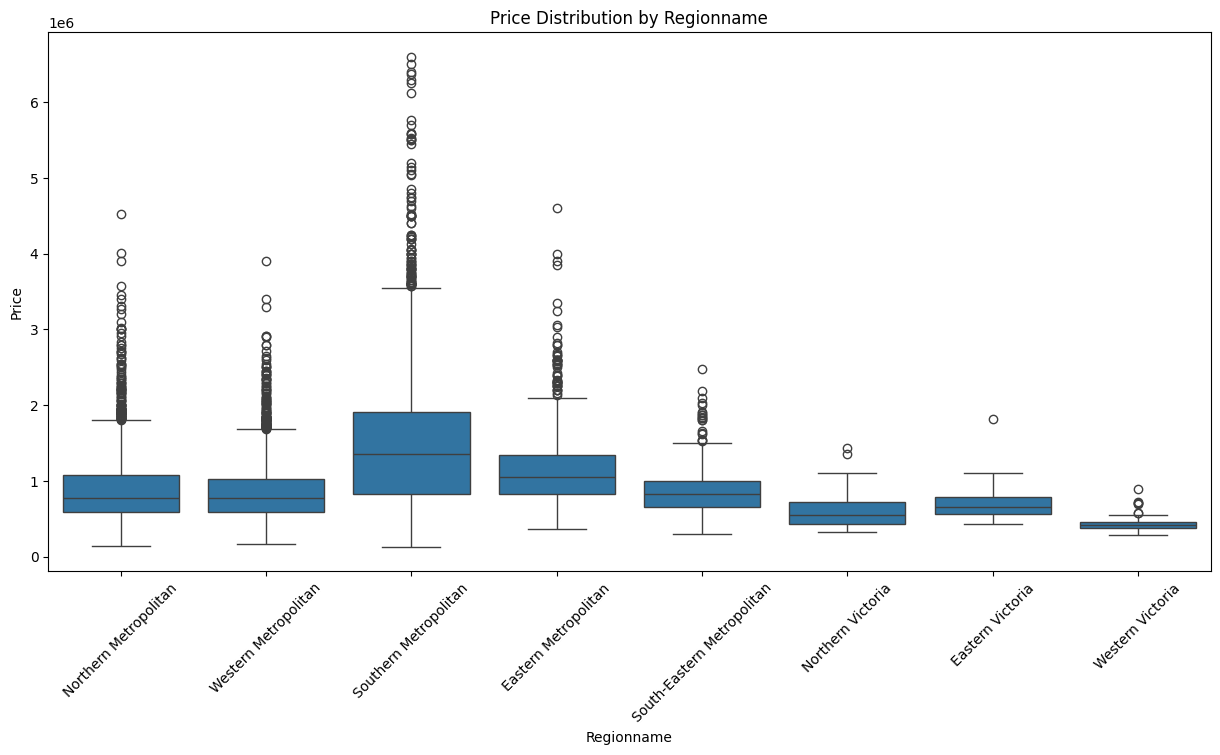

In [432]:
# Lets check the relation of price with different locations
plt.figure(figsize=(15, 7))
sns.boxplot(y='Price', x='Regionname', data=combined_df)  # Interchanged x and y
plt.title('Price Distribution by Regionname')
plt.xticks(rotation=45)
plt.show()

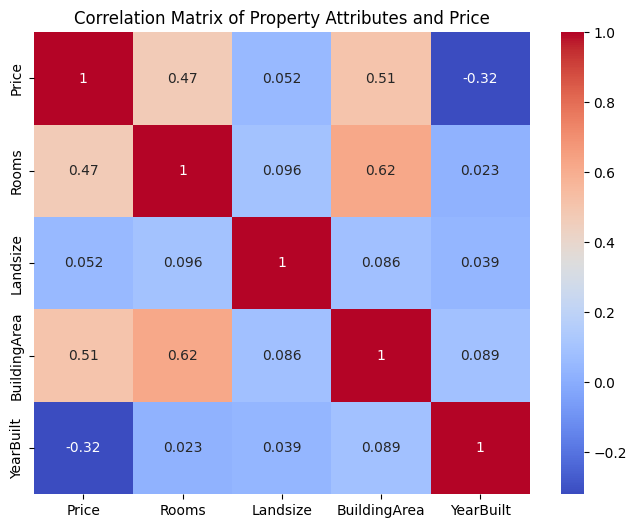

In [433]:
# Lets plot a histogram to check the correlation between different numeric columns
correlation_matrix = combined_df[['Price', 'Rooms', 'Landsize', 'BuildingArea', 'YearBuilt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Property Attributes and Price')
plt.show()

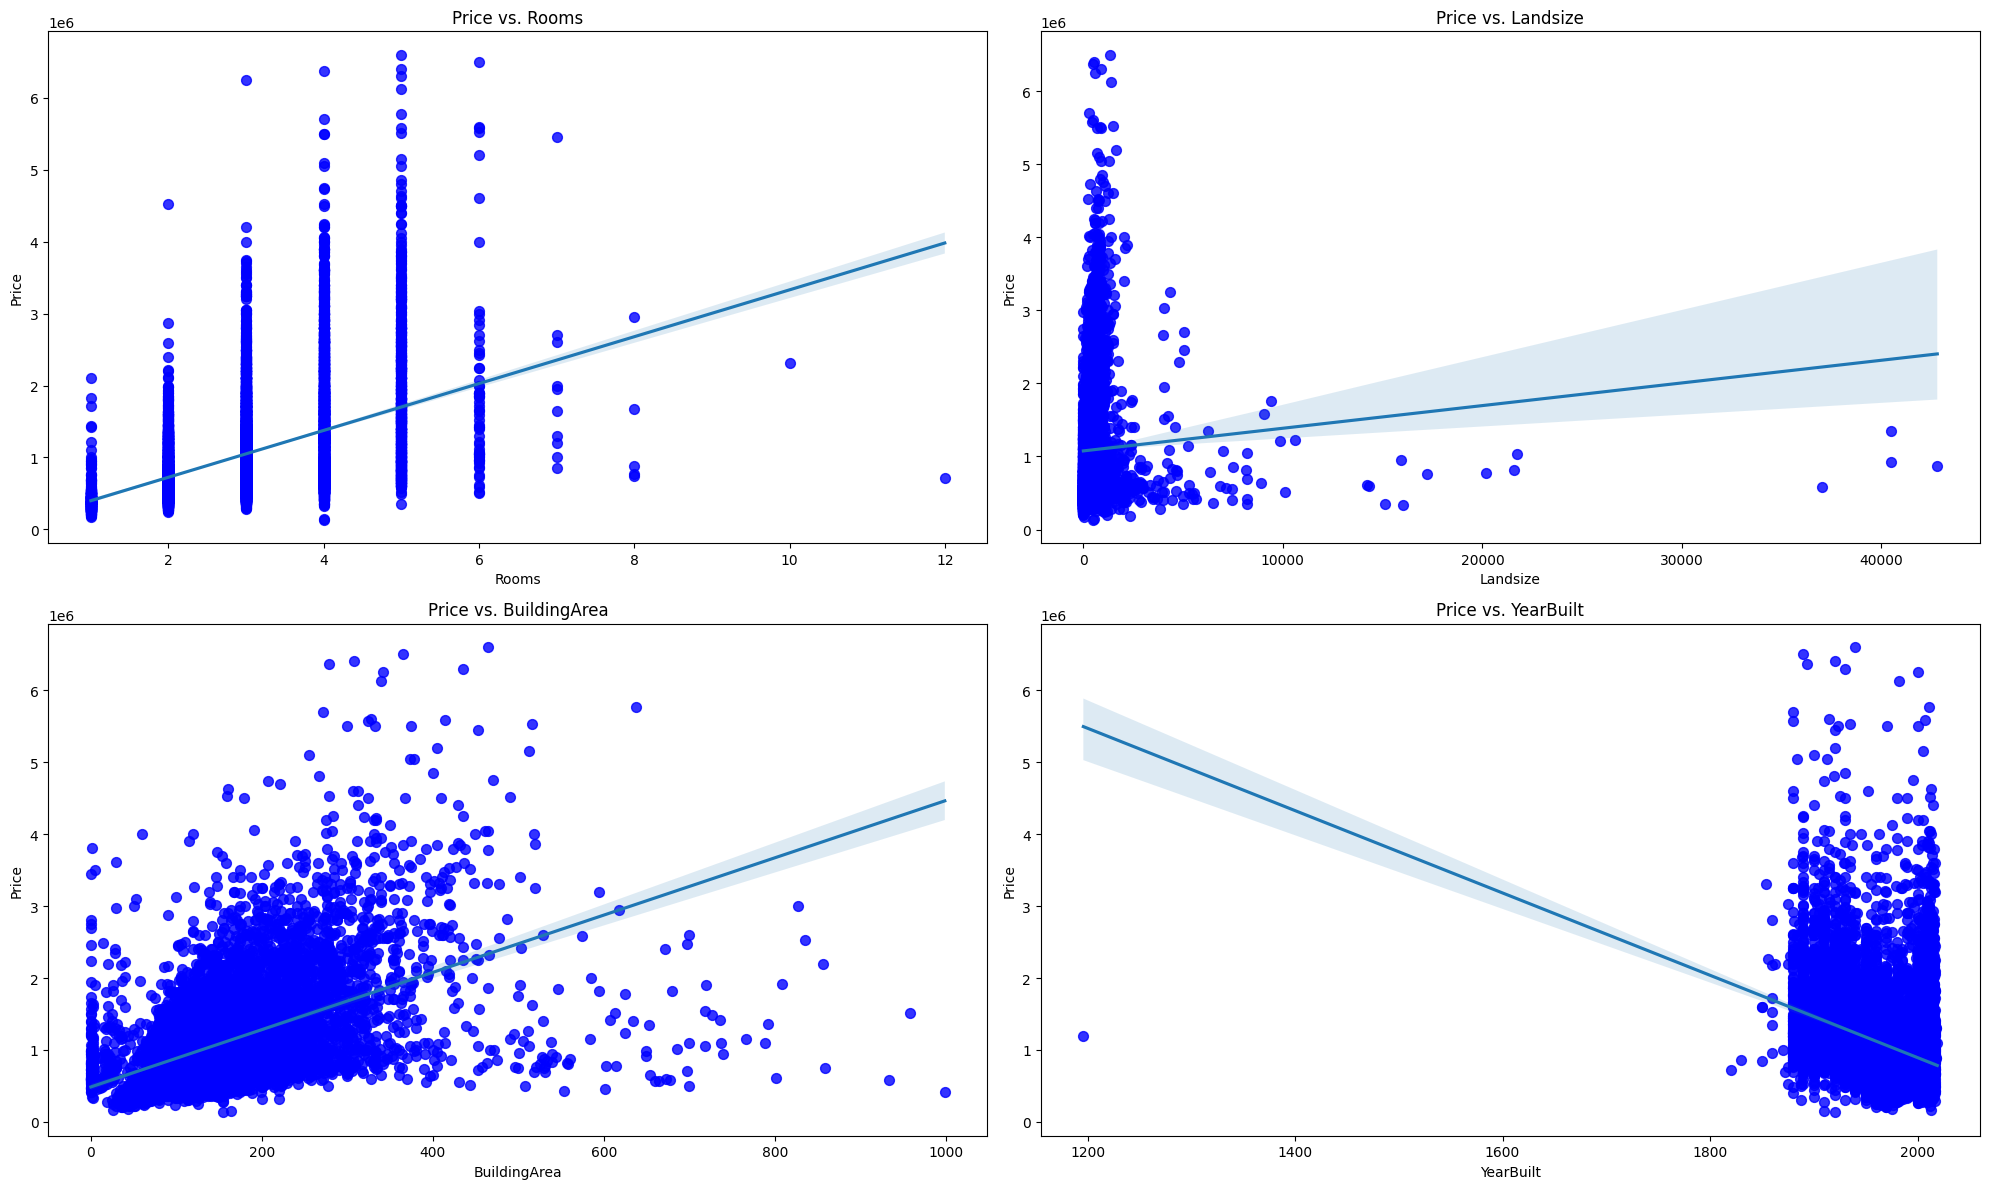

In [435]:
# Let see the relation of 'Rooms', 'Landsize', 'BuildingArea', 'YearBuilt' columns with price separately
numerical_attributes = ['Rooms', 'Landsize', 'BuildingArea', 'YearBuilt']

# Creating a single figure with 4 subplots arranged in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Looping through numerical attributes and plot each scatter plot
for i, attribute in enumerate(numerical_attributes):
    sns.regplot(x=attribute, y='Price', data=combined_df, scatter_kws={"s": 50, "color": "blue"}, ax=axes[i])
    axes[i].set_title(f'Price vs. {attribute}')
    axes[i].set_xlabel(attribute)
    axes[i].set_ylabel('Price')

# Adjusting layout
plt.tight_layout()
plt.show()

**Conclusion:**

* We did a lot of preprocessing on the dataset at the start based on out EDA.
* Then we saw the summary statistics of the dataset(we found some missing values that we handled)
* Then saw the distribution of the Price and BuildingArea(we found some ouliers that we handled)
* We also saw the trend of price over time for different type of properties(we found that the trend was faily stable)
* We also saw the Relation between price and location(we found that the suthern metropolitan has the most expensive houses)
* We also plotted a heatmap visualize the correlation between diffeen numeric columns
* Then we plotted some of the highest correlated columns separately to see the trend(we found that with the increase in Rooms, landsize and BuildingArea the prices increased and with the increase in age of the house the price desreased)





# Question 4:
Perform the following tasks: (20 Marks)  

● Analyze and describe the data by .head(), .shape , .describe() etc  
● Visualize the data with different plots ( Histogram, line or bar plot, Scatter plot, Box or violin plots)   
NOTE : Also write the insights you learn from different plots.  
● Understand the data, handle missing values if exists  
● Apply strategies can be employed to deal with missing values? (e.g., imputation, removal, etc.) Use different imputation methods for different features.  
● Identify outliers in the numerical features and handle them with different methods of outlier removal.  
● Convert categorical variables by one-hot encoded or treat with other encoding methods?  
● Do any numerical features require transformation (e.g., min-max scaling, standard scaling, log transformation) to achieve a more normal distribution?  
● Did scaling or normalization improve model performance?  
● Are there any inconsistencies or errors in the data (e.g., negative fare amounts, unrealistic values)?  
● Address these inconsistencies to ensure data quality?  
● Which features are most important for predicting the target variable?  
● Can feature selection techniques (e.g., feature importance, recursive feature elimination) help identify the most relevant features?  
● What are the relationships between different numerical features? Identify  
● relationship between the variable through heatmap or other correlation methods.  

**Dataset** Use ```sns.load_dataset(“taxis”)``` to load the dataset.

In [102]:
# Importing the taxis dataframe from seaborn
taxis_df = sns.load_dataset('taxis')

# Renaming some of the columns
taxis_df = taxis_df.rename(columns={'pickup': 'pickup_datetime', 'dropoff': 'dropoff_datetime'})
# Creating a column that tells the duration of the ride. It can be a good predictor of fare of the ride
taxis_df['trip_duration'] = (taxis_df['dropoff_datetime'] - taxis_df['pickup_datetime']).dt.total_seconds()
# Creating a column that tells the duration fo the ride. It can be a good predictor of the fare as some hours are peak hours
taxis_df['pickup_hour'] = taxis_df['pickup_datetime'].dt.hour

In [103]:
taxis_df.shape

(6433, 16)

In [104]:
taxis_df.head()

,pickup_datetime,dropoff_datetime,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,trip_duration,pickup_hour
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,375.0,20
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,425.0,16
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,444.0,17
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1552.0,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,572.0,13


>Column Descriptions for taxis_df (Unnamed):

**pickup:** The date and time when the passenger(s) were picked up.  
**dropoff:** The date and time when the passenger(s) were dropped off.  
**passengers:** The number of passengers on the trip.  
**distance:** The distance of the taxi trip, probably in miles.  
**fare:** The base fare for the taxi trip, excluding tip, tolls, etc.  
**tip:** The amount of tip given to the driver.  
**tolls:** Any road tolls incurred during the trip.  
**total:** The total amount charged to the passenger (fare + tip + tolls).  
**color:** The color of the taxi (e.g., yellow, green). This is a clue that the data might be from NYC.  
**payment:** The method of payment used by the passenger (e.g., credit card, cash).  
**pickup_zone** The name of the zone where the passenger was picked up. These zones likely correspond to neighborhoods or specific areas.  
**dropoff_zone:** The name of the zone where the passenger was dropped off.  
**pickup_borough:** The borough in NYC where the pickup occurred (e.g., Manhattan, Queens, Brooklyn, Bronx, Staten Island).  
**dropoff_borough:** The borough in NYC where the dropoff occurred.

In [105]:
taxis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pickup_datetime   6433 non-null   datetime64[ns]
 1   dropoff_datetime  6433 non-null   datetime64[ns]
 2   passengers        6433 non-null   int64         
 3   distance          6433 non-null   float64       
 4   fare              6433 non-null   float64       
 5   tip               6433 non-null   float64       
 6   tolls             6433 non-null   float64       
 7   total             6433 non-null   float64       
 8   color             6433 non-null   object        
 9   payment           6389 non-null   object        
 10  pickup_zone       6407 non-null   object        
 11  dropoff_zone      6388 non-null   object        
 12  pickup_borough    6407 non-null   object        
 13  dropoff_borough   6388 non-null   object        
 14  trip_duration     6433 n

In [106]:
taxis_df.describe()

,pickup_datetime,dropoff_datetime,passengers,distance,fare,tip,tolls,total,trip_duration,pickup_hour
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794,860.976994,13.873465
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000,0.000000,0.000000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000,390.000000,10.000000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000,654.000000,15.000000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000,1111.000000,19.000000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000,6460.000000,23.000000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570,698.633516,6.069752


In [107]:
# Imputing the missing values in the payment column using the KNNImputer from sklearn
# Before doing this I saw there was a relation between peyment and some columns(that i used below) so I thought to impute
# the values using Machine Learning rather than dropping or simple imputation

# Define features to be used for imputation
features = ['distance', 'fare', 'tip', 'tolls', 'total']

# Encode the 'payment' column
label_encoder = LabelEncoder()
taxis_df['payment_encoded'] = label_encoder.fit_transform(taxis_df['payment'].astype(str))

# Using KNN imputer
imputer = KNNImputer(n_neighbors=5)
taxis_df[features + ['payment_encoded']] = imputer.fit_transform(taxis_df[features + ['payment_encoded']])

# Getting our labels back
taxis_df['payment'] = label_encoder.inverse_transform(taxis_df['payment_encoded'].astype(int))

# Dropping the encoded payment column as it is no more needed
taxis_df = taxis_df.drop('payment_encoded', axis=1)

In [108]:
# Now dropping the remaining null values(as we can predict them and imputation won't be a good idea as they are location)
taxis_df = taxis_df.dropna()

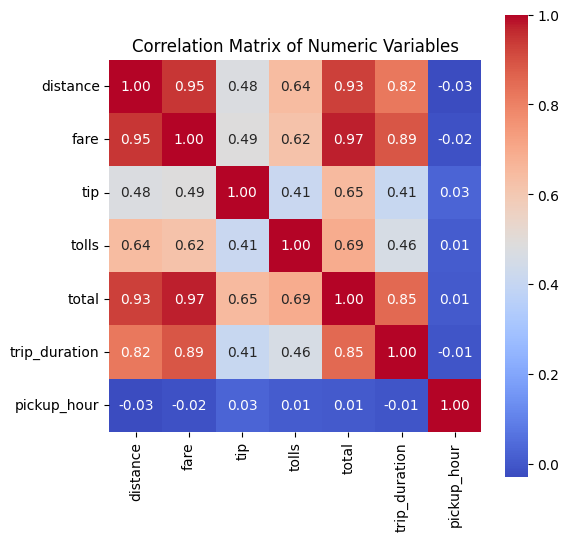

In [109]:
# Creating a correlation matrix of the numeric columns
correlation_matrix = taxis_df[['distance', 'fare', 'tip', 'tolls', 'total','trip_duration','pickup_hour']].corr()

# Generating a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, ax=ax)

# Set the title and show the plot
plt.title("Correlation Matrix of Numeric Variables")
plt.show()



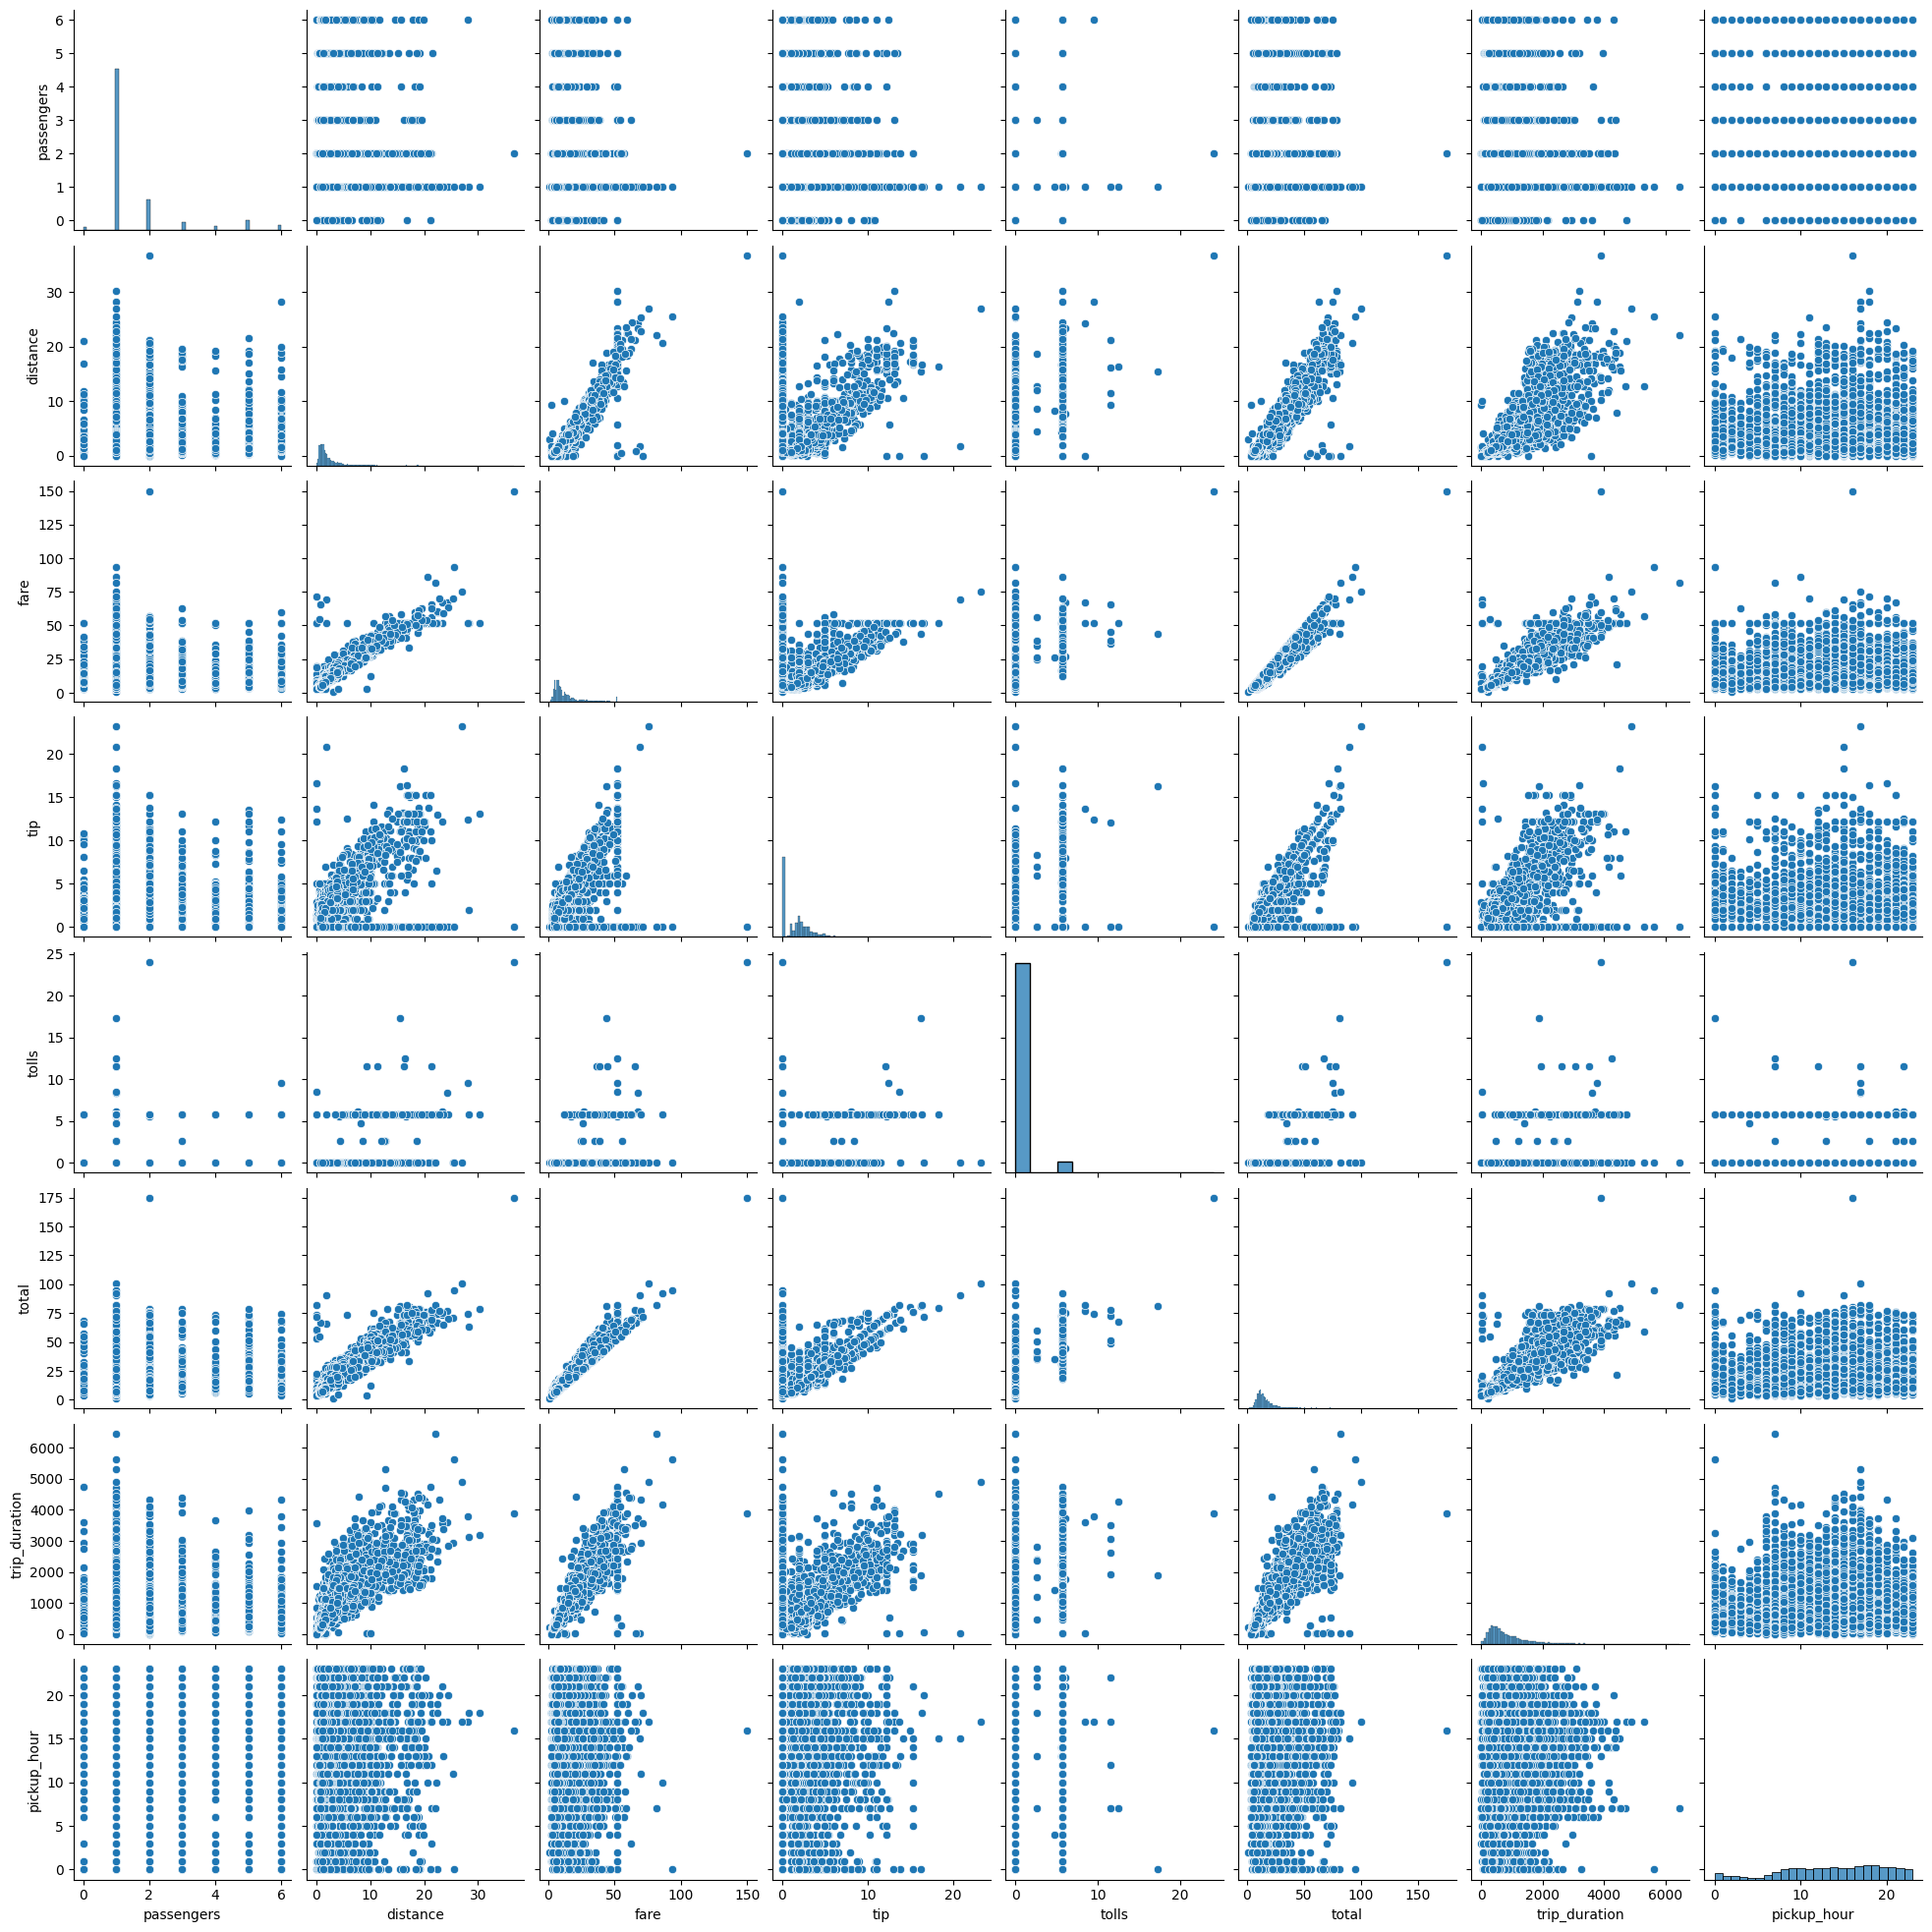

In [110]:
sns.pairplot(taxis_df)

**From the plot above we can observe that:**
* Mostly there are 2 or 3 passengers par ride and fare doesn't increases with the increase in passengers
* Mostly fare and distance of ride are low
* Mostly people give no tips. If they give then it is very less
* Mostly tolls are low and total amount paid is also low

From the distribution of numeric columns we can see that there are some outlier.
We will see them in detail


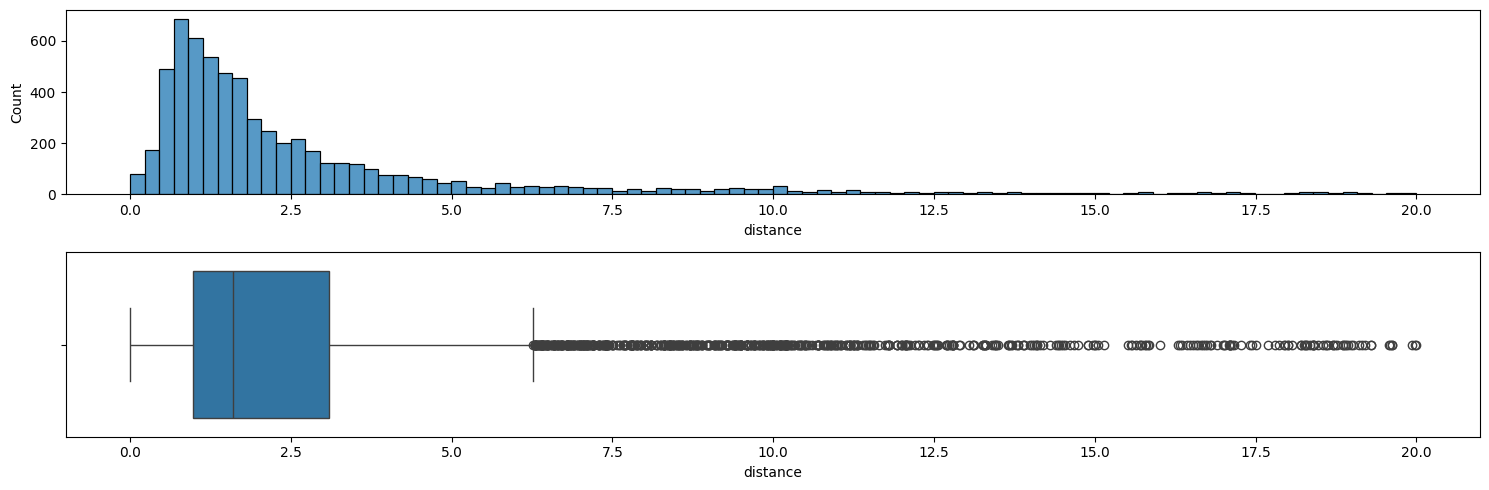

In [123]:
taxis_df = taxis_df[taxis_df.distance < 20]
fig, ax = plt.subplots(2,1, figsize=(15,5))
sns.histplot(data=taxis_df, x='distance', ax=ax[0])
sns.boxplot(data=taxis_df, x='distance', ax=ax[1])
plt.tight_layout()
plt.show()

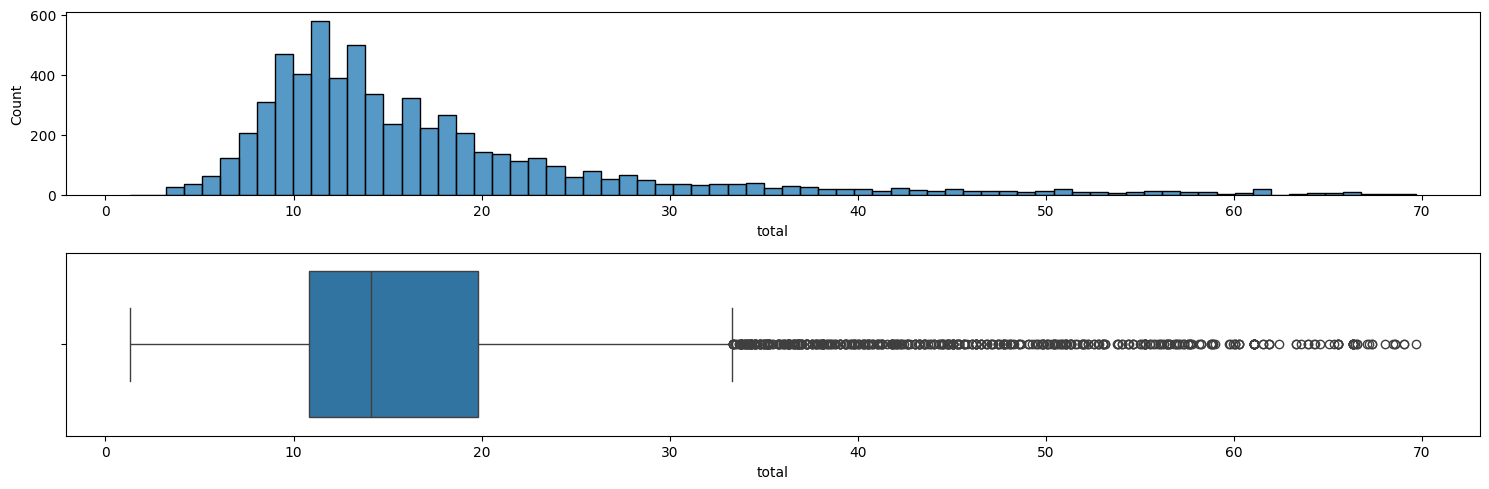

In [125]:
taxis_df = taxis_df[taxis_df.total < 70]

fig, ax = plt.subplots(2,1, figsize=(15,5))
sns.histplot(data=taxis_df, x='total', ax=ax[0])
sns.boxplot(data=taxis_df, x='total', ax=ax[1])
plt.tight_layout()
plt.show()

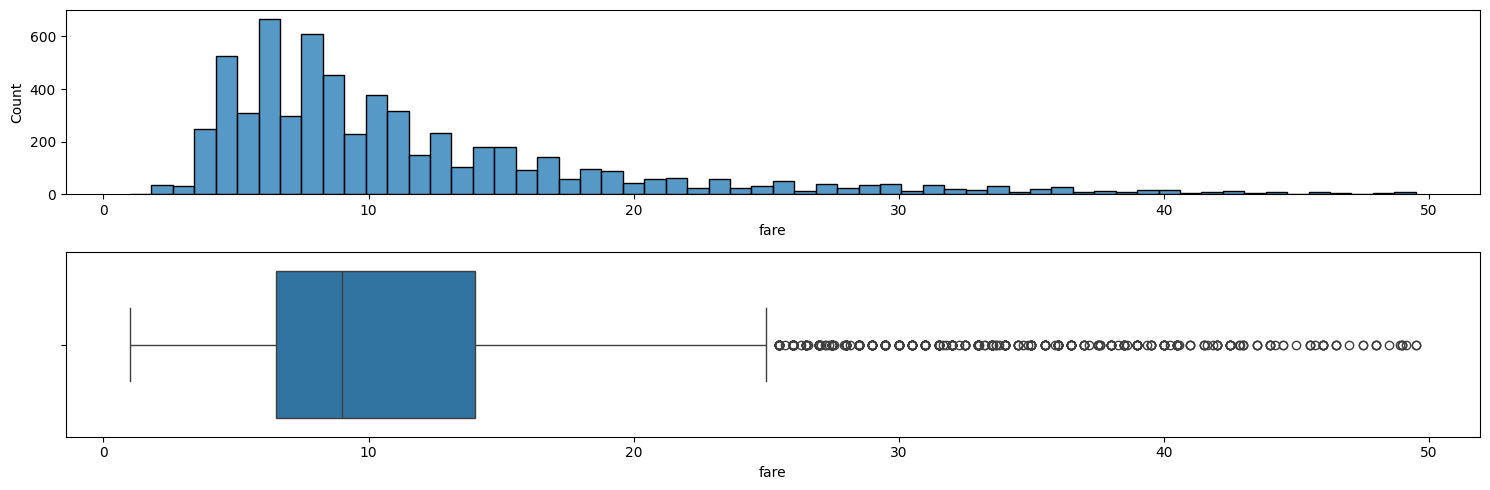

In [127]:
taxis_df = taxis_df[taxis_df.fare < 50]
fig, ax = plt.subplots(2,1, figsize=(15,5))
sns.histplot(data=taxis_df, x='fare', ax=ax[0])
sns.boxplot(data=taxis_df, x='fare', ax=ax[1])
plt.tight_layout()
plt.show()

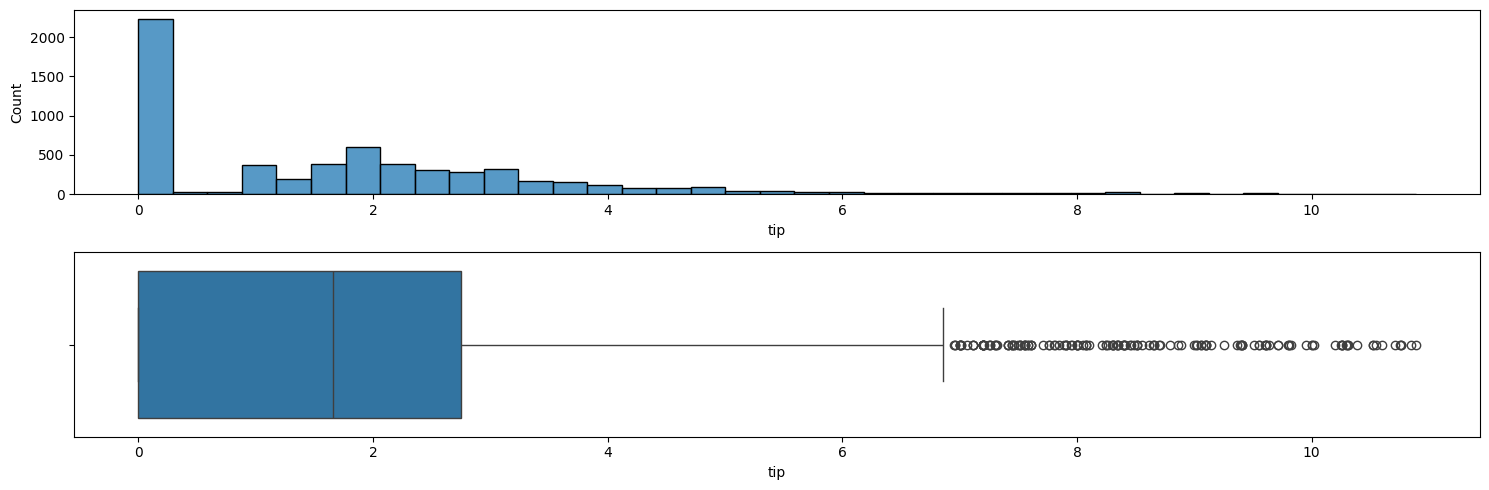

In [129]:
taxis_df = taxis_df[taxis_df.tip < 11]
fig, ax = plt.subplots(2,1, figsize=(15,5))
sns.histplot(data=taxis_df, x='tip', ax=ax[0])
sns.boxplot(data=taxis_df, x='tip', ax=ax[1])
plt.tight_layout()
plt.show()

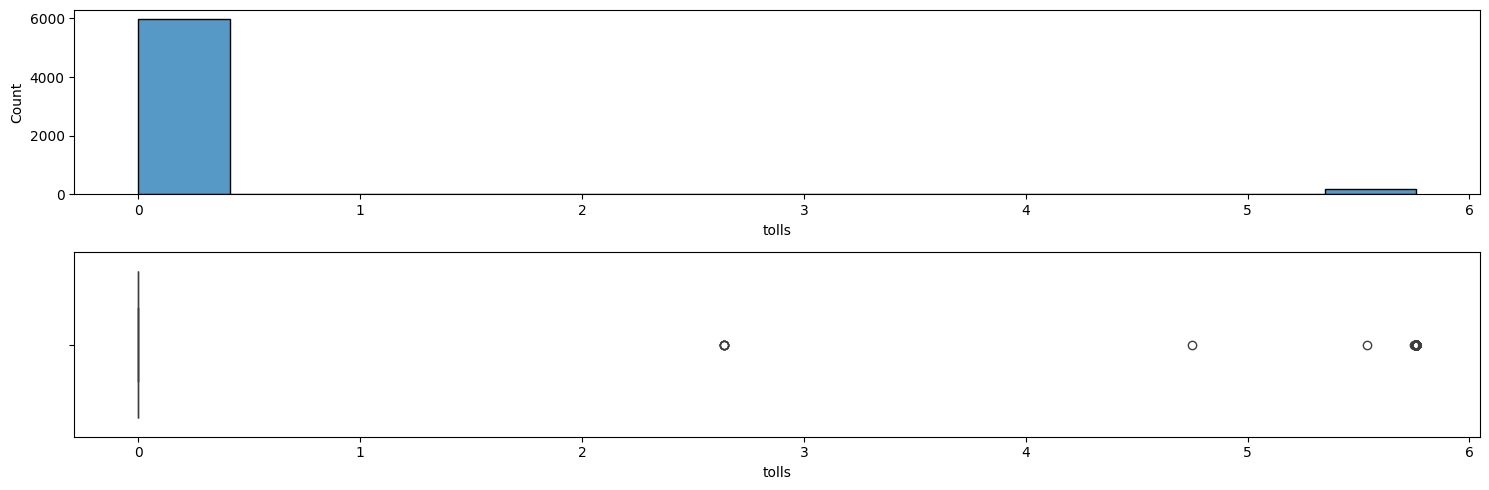

In [131]:
taxis_df = taxis_df[taxis_df.tolls < 6]
fig, ax = plt.subplots(2,1, figsize=(15,5))
sns.histplot(data=taxis_df, x='tolls', ax=ax[0])
sns.boxplot(data=taxis_df, x='tolls', ax=ax[1])
plt.tight_layout()
plt.show()

In these plots we can see that there are outliers in the dataset in many column. I built a model without handling the outliers and with handling the outliers. So after handling the outliers the model worked better

Before model building lets see some other relations. lets see categorical columns

<Axes: xlabel='color', ylabel='fare'>

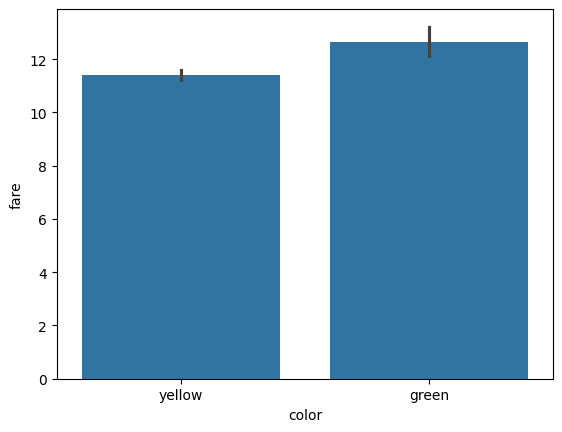

In [132]:
# Lets see if the color of taxe has any effect on the fare(somehow some color could be expansive)
sns.barplot(data=taxis_df, x='color', y='fare')

So green has a little higher fare. This could be a coincidence so we will not use it as it could be misleading for our model.

<Axes: xlabel='pickup_hour', ylabel='fare'>

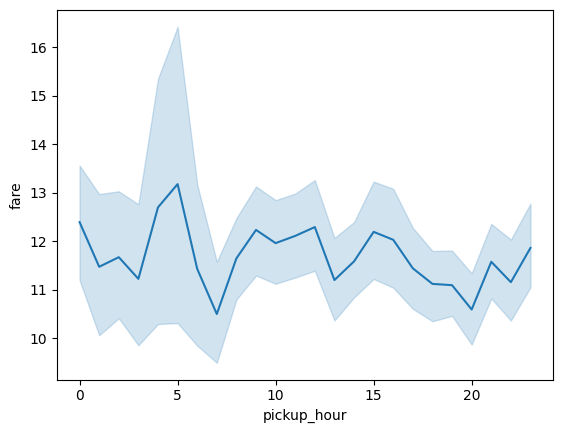

In [153]:
sns.lineplot(data=taxis_df, x='pickup_hour', y='fare')

We can see a little relation between the hour of day and the fare. Aroung 5am the fare is higher. This can be due to the fact it is early morning and there are not much taxis at time or people need urgent ride

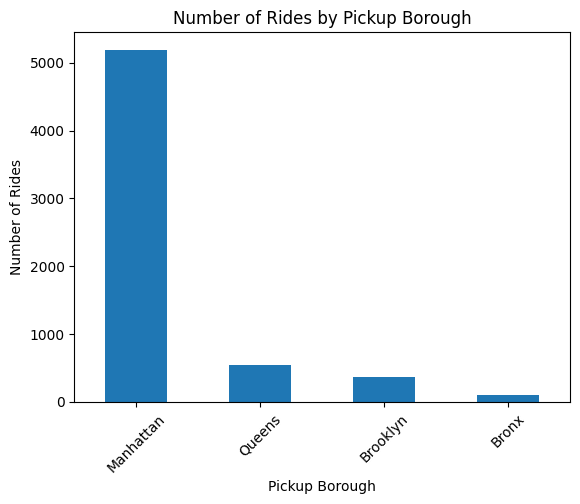

In [133]:
# Grouping the data by pickup_borough and counting the number of rides
pickup_borough_counts = taxis_df.groupby('pickup_borough')['pickup_borough'].count().sort_values(ascending=False)

# Creating a bar plot to visualize the results
pickup_borough_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Pickup Borough')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Pickup Borough')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

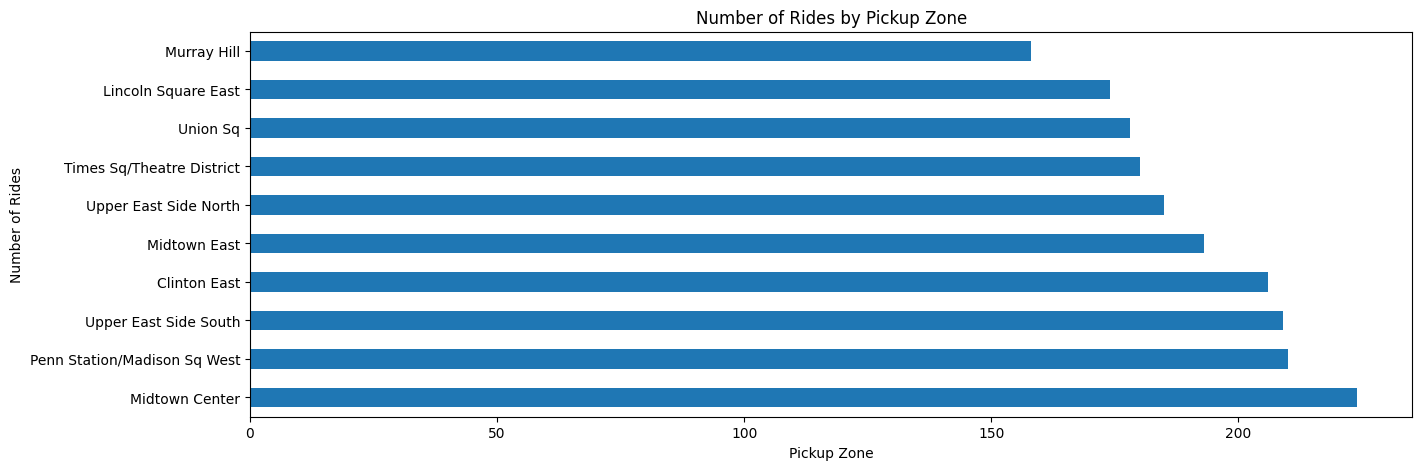

In [134]:
# Grouping the data by pickup_borough and counting the number of rides
pickup_borough_counts = taxis_df.groupby('pickup_zone')['pickup_zone'].count().sort_values(ascending=False).head(10)

# Creating a bar plot to visualize the results
pickup_borough_counts.plot(kind='barh', figsize=(15,5))

# Adding labels and title
plt.xlabel('Pickup Zone')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Pickup Zone')

# Rotating the x-axis labels for better readability
plt.show()

**We can see that:**
* **Manhattan** had the most number of rides in the borough.
* **Midtown Center** and **Upper East Side South** had the most number of ride in the zones.

### Now lets start the model building

In [135]:
# We will use 'passengers', 'distance','tip', 'tolls', 'trip_duration','pickup_hour' for model training
# We didn't used total or tip as they can cause target leakage
# Color and payment method are not good predictor of wheather the fair will be high or low
x = taxis_df[['passengers', 'distance','tip', 'tolls', 'trip_duration','pickup_hour']]
y = taxis_df['fare']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

In [136]:
# Scaling the datasets using the standard scaler(I tried without and with it and got better results with it)
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [137]:
model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(x_train_scaled, y_train)
y_pred_scaled = model.predict(x_test_scaled)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 4949, number of used features: 6
[LightGBM] [Info] Start training from score 11.627042


In [138]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_scaled))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_scaled))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred_scaled)))
print("R-squared:", r2_score(y_test, y_pred_scaled))

Mean Squared Error: 1.1133810113802023
Mean Absolute Error: 0.4240360286260781
Root Mean Squared Error: 1.0551687122826388
R-squared: 0.9805948953920818


After doing all the preprocessing the final scores of the model are shown above. And they are above exceptation.   
I also tried different parameter tuning using GridSearchCV but it became even worse.

This model had practical application as it can be used for real world fair calculation by taxy companies like Uber etc(after adding some more features like the type of the car and the country)

>Until next time  
**Allah Hafiz**